# SmartHealth T2D Modeling Pipleline using UCI Diabetes Dataset
** Part 1: Exploratory Data Analysis (EDA)
** Part 2: Data Preprocessing and T2D Modeling

This notebook supports the **Smart Health: Summer Research in Diabetes Prediction Using ML** project.

**Objective:**
- Conduct exploratory data analysis (EDA).
- Perform necessary preprocessing and encoding.
- Prepare dataset for supervised machine learning models aimed at predicting early-stage Type 2 Diabetes.
"""


# Part 1: Exploratory Data Analysis (EDA)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import joblib


# Set visualization style
sns.set(style="whitegrid")

In [2]:
# Data Loading with Error Handling
# Load google drive folder
from google.colab import drive
drive.mount('/content/drive/')


# Step 2b: Load data from Google Drive
file_path = "/content/drive/MyDrive/ucidata.csv"
df = pd.read_csv("/content/drive/MyDrive/ucidata.csv")


Mounted at /content/drive/


In [3]:
# Data Overview
# Separate numerical and categorical summaries
print("\nNumerical Data Summary:")
display(df.describe())

print("\nCategorical Data Summary:")
display(df.describe(include=['object']))

print("\nData Information:")
df.info()

# Check for missing values
print("\nMissing Values Check:")
print(df.isnull().sum())



Numerical Data Summary:


,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000



Categorical Data Summary:


,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class  

In [4]:
# Encode Yes/No and Male/Female to 1/0
df_encoded = df.copy()
df_encoded = df_encoded.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'Positive': 1, 'Negative': 0})

# recall Load dataset from Google Drive
df = pd.read_csv("/content/drive/MyDrive/ucidata.csv")

df.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}, inplace=True)
df['class'] = df['class'].map({'Positive': 1, 'Negative': 0})
df.head()

<ipython-input-4-5c8f9bc90557>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'Positive': 1, 'Negative': 0})
<ipython-input-4-5c8f9bc90557>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}, inplace=True)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [5]:
# recall: Load dataset from Google Drive
df = pd.read_csv("/content/drive/MyDrive/ucidata.csv")
df.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}, inplace=True)
df['class'] = df['class'].map({'Positive': 1, 'Negative': 0})


<ipython-input-5-1b3401ff2b32>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}, inplace=True)


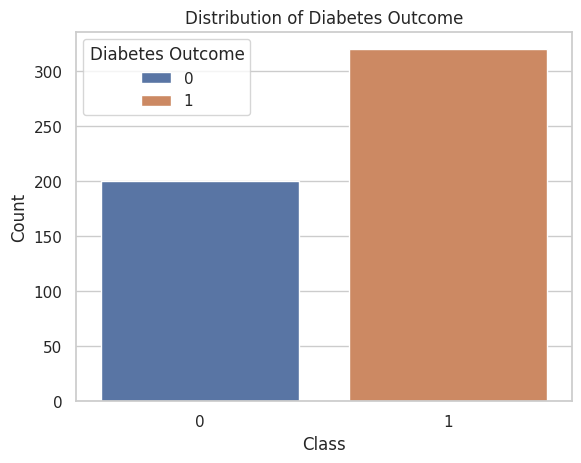

In [6]:
# step 5: Class distribution with legend
sns.countplot(x='class', hue='class', data=df_encoded)
plt.title("Distribution of Diabetes Outcome")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend(title='Diabetes Outcome')  # Add legend with title
plt.show()

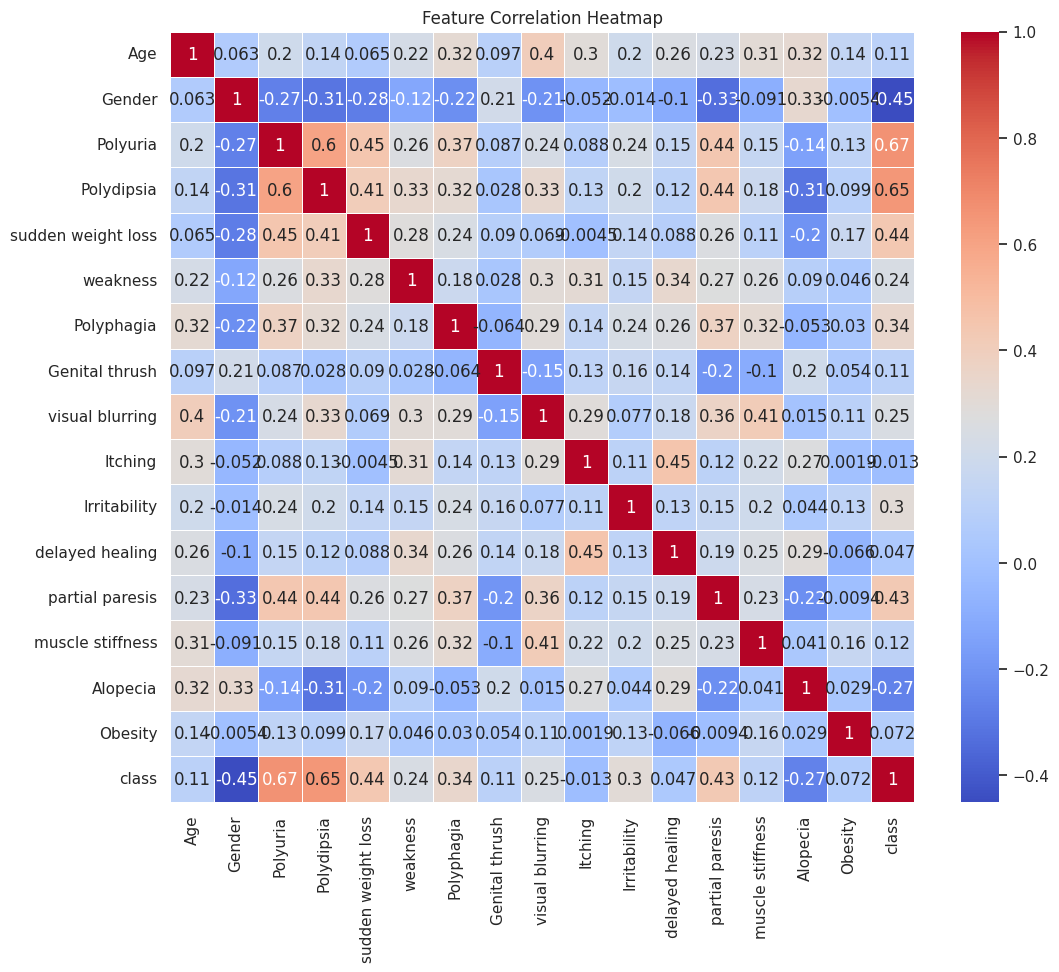

In [7]:
# Feature Correlation Heatmap
# Convert all remaining categorical values
# Replace string values in Gender and Class if not yet encoded
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [8]:
# Feature scaling
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

In [9]:
# Step 3: Train-Test Split
# Define features and target
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Output shapes of resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (416, 16) (416,)
Testing set shape: (104, 16) (104,)


In [10]:
# Training Mthe models
# Importing baseline models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42, probability=True),
    "Naive Bayes": GaussianNB()
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} model trained.")

Logistic Regression model trained.
Decision Tree model trained.
Random Forest model trained.
KNN model trained.
SVM model trained.
Naive Bayes model trained.



Logistic Regression Performance:
              precision    recall  f1-score   support

    Negative       0.89      0.97      0.93        40
    Positive       0.98      0.92      0.95        64

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



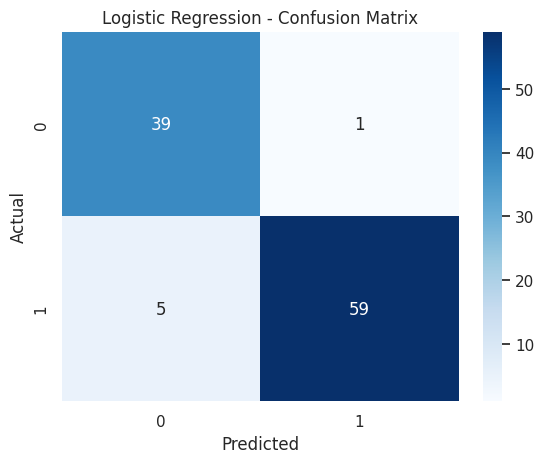


Decision Tree Performance:
              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99        40
    Positive       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



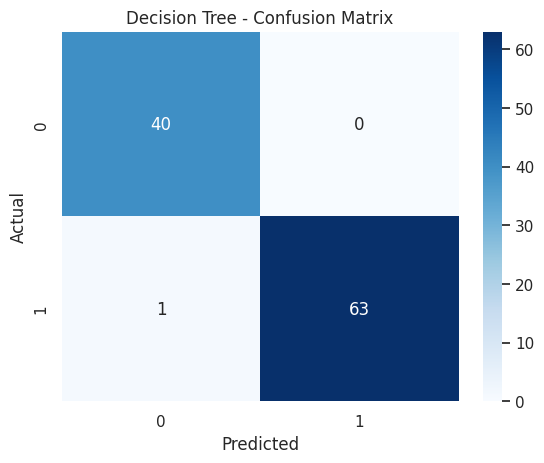


Random Forest Performance:
              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99        40
    Positive       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



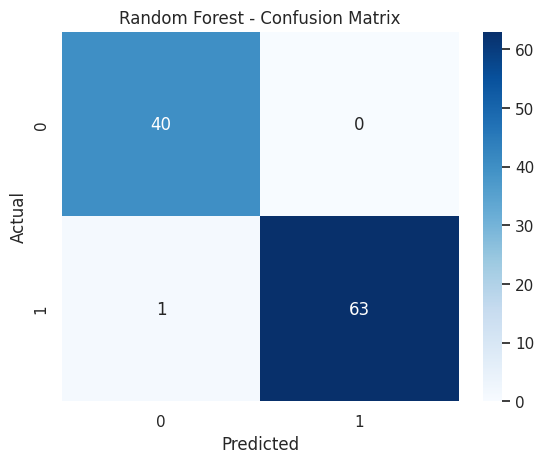


KNN Performance:
              precision    recall  f1-score   support

    Negative       0.87      0.97      0.92        40
    Positive       0.98      0.91      0.94        64

    accuracy                           0.93       104
   macro avg       0.92      0.94      0.93       104
weighted avg       0.94      0.93      0.93       104



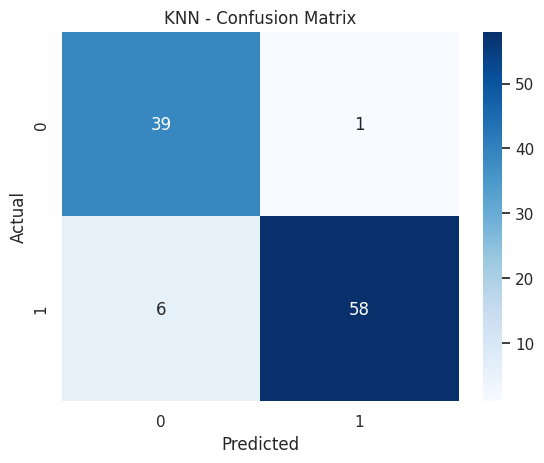


SVM Performance:
              precision    recall  f1-score   support

    Negative       1.00      0.97      0.99        40
    Positive       0.98      1.00      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



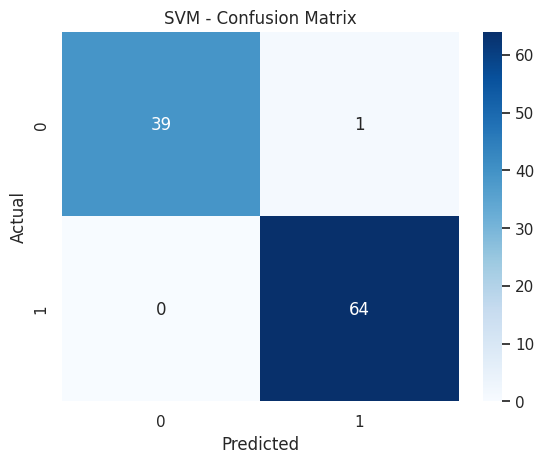


Naive Bayes Performance:
              precision    recall  f1-score   support

    Negative       0.90      0.95      0.93        40
    Positive       0.97      0.94      0.95        64

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



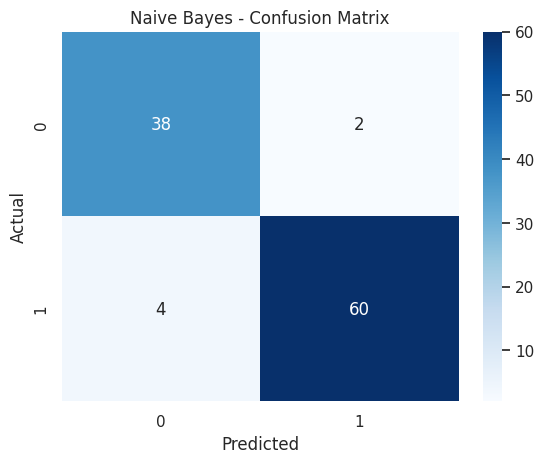

In [11]:
# Step 4: Model Evaluation
# Import evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate models
evaluation_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    evaluation_results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Display model-specific evaluation results
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



In [12]:
# Summarize results clearly in a DataFrame
evaluation_df = pd.DataFrame(evaluation_results).T
print("\nSummary of Evaluation Metrics:")
display(evaluation_df)


Summary of Evaluation Metrics:


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.942308,0.983333,0.921875,0.951613
Decision Tree,0.990385,1.000000,0.984375,0.992126
Random Forest,0.990385,1.000000,0.984375,0.992126
KNN,0.932692,0.983051,0.906250,0.943089
SVM,0.990385,0.984615,1.000000,0.992248
Naive Bayes,0.942308,0.967742,0.937500,0.952381


In [13]:
# Step 5: Model Comparison and Selection
# Rank models by F1 Score (you can also sort by Accuracy if desired)
best_models = evaluation_df.sort_values(by='F1 Score', ascending=False)
print("Models ranked by F1 Score:")
display(best_models)

Models ranked by F1 Score:


,Accuracy,Precision,Recall,F1 Score
SVM,0.990385,0.984615,1.000000,0.992248
Decision Tree,0.990385,1.000000,0.984375,0.992126
Random Forest,0.990385,1.000000,0.984375,0.992126
Naive Bayes,0.942308,0.967742,0.937500,0.952381
Logistic Regression,0.942308,0.983333,0.921875,0.951613
KNN,0.932692,0.983051,0.906250,0.943089


In [14]:
# Step 6: Hyperparameter Tuning
# fine-tune the SVM using GridSearchCV to find the optimal combination of C, kernel, and gamma.

from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_svm = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_svm.fit(X_train, y_train)

# Best parameters and model
print("Best SVM Parameters:", grid_svm.best_params_)
print("Best F1 Score from GridSearchCV:", grid_svm.best_score_)

# Final model
best_svm_model = grid_svm.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best F1 Score from GridSearchCV: 0.9704643221641103


Classification Report (Tuned SVM on Test Set):
              precision    recall  f1-score   support

    Negative       0.95      0.97      0.96        40
    Positive       0.98      0.97      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



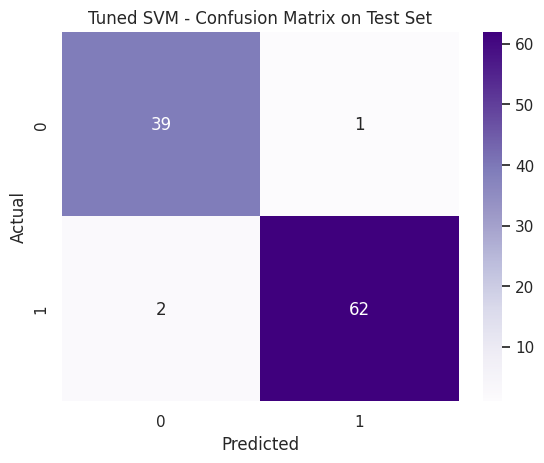

In [19]:
# Step 7: Final Model Evaluation
# evaluate this tuned SVM model on the test set to confirm its generalization performance
# Predict on the test set using the best tuned SVM model
y_pred_tuned = best_svm_model.predict(X_test)

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report (Tuned SVM on Test Set):")
print(classification_report(y_test, y_pred_tuned, target_names=['Negative', 'Positive']))

# Confusion matrix plot
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, cmap='Purples', fmt='d')
plt.title('Tuned SVM - Confusion Matrix on Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# 9. GridSearchCV for All 6 Models
param_grids = {
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'max_features': ['sqrt']
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }
}
models_to_tune = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(probability=True, random_state=42)
}

best_models = {}

for name in models_to_tune:
    print(f"Tuning {name}...")
    grid = GridSearchCV(models_to_tune[name], param_grids[name], scoring='f1', cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Best {name} Parameters:", grid.best_params_)
    print(f"Best {name} F1 Score (CV):", grid.best_score_)


Tuning KNN...
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best KNN F1 Score (CV): 0.9719147891012601
Tuning Decision Tree...
Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}
Best Decision Tree F1 Score (CV): 0.9663731314307901
Tuning Random Forest...
Best Random Forest Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Best Random Forest F1 Score (CV): 0.9843839476384613
Tuning Logistic Regression...
Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression F1 Score (CV): 0.9353992727312237
Tuning SVM...
Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM F1 Score (CV): 0.9704643221641103



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        40
           1       0.98      0.92      0.95        64

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



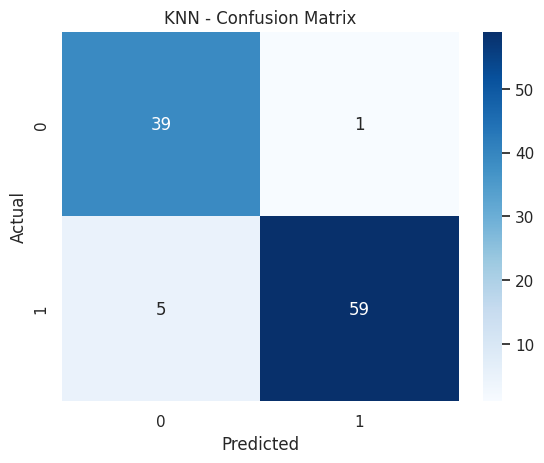


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        40
           1       1.00      0.94      0.97        64

    accuracy                           0.96       104
   macro avg       0.95      0.97      0.96       104
weighted avg       0.97      0.96      0.96       104



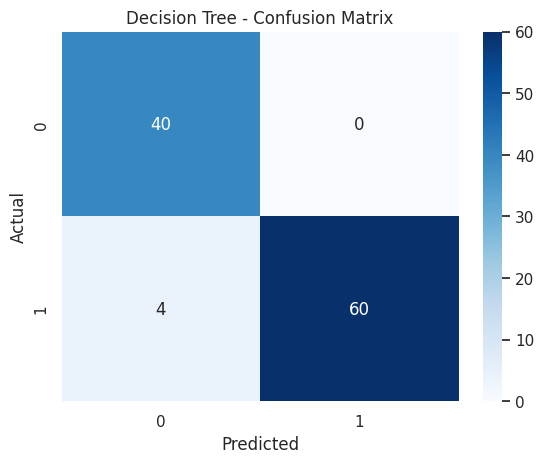


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



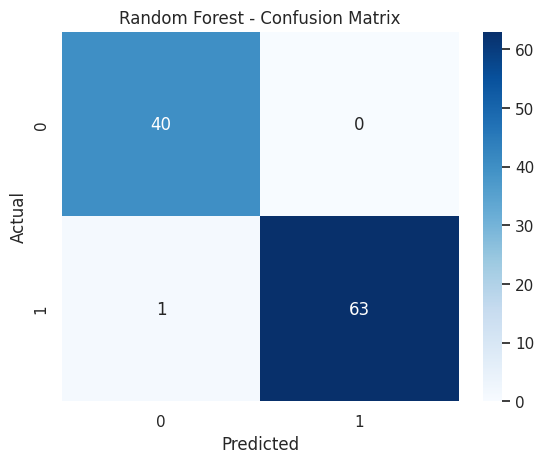


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        40
           1       0.98      0.92      0.95        64

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



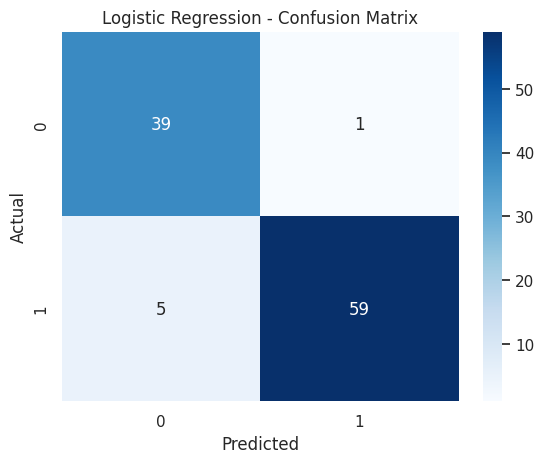


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.98      0.97      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



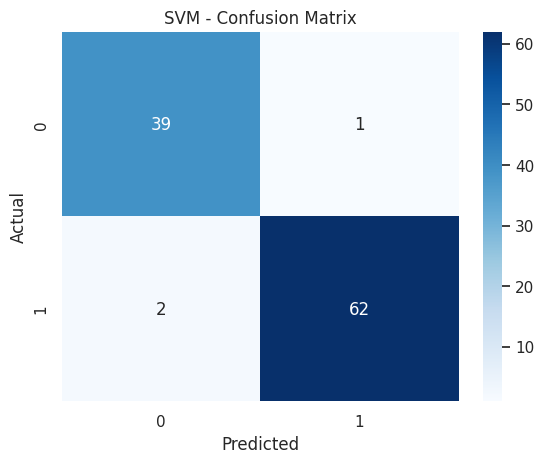

In [20]:
# 10. Final Evaluation Pipeline
final_results = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    final_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [22]:
# Summary table
final_eval_df = pd.DataFrame(final_results).T
print("\nFinal Tuned Model Comparison:")
display(final_eval_df)




Final Tuned Model Comparison:


,Accuracy,Precision,Recall,F1 Score
KNN,0.942308,0.983333,0.921875,0.951613
Decision Tree,0.961538,1.000000,0.937500,0.967742
Random Forest,0.990385,1.000000,0.984375,0.992126
Logistic Regression,0.942308,0.983333,0.921875,0.951613
SVM,0.971154,0.984127,0.968750,0.976378


In [23]:
# Evaluate Naive Bayes separately
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\nEvaluating Naive Bayes...")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

evaluation_results['Naive Bayes'] = {
    "Accuracy": accuracy_score(y_test, y_pred_nb),
    "Precision": precision_score(y_test, y_pred_nb),
    "Recall": recall_score(y_test, y_pred_nb),
    "F1 Score": f1_score(y_test, y_pred_nb)
}
print("Naive Bayes evaluation complete.")


Evaluating Naive Bayes...
Naive Bayes evaluation complete.


In [24]:
# regenerate the evaluation_df summary:
evaluation_df = pd.DataFrame(evaluation_results).T
display(evaluation_df)

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.942308,0.983333,0.921875,0.951613
Decision Tree,0.990385,1.000000,0.984375,0.992126
Random Forest,0.990385,1.000000,0.984375,0.992126
KNN,0.932692,0.983051,0.906250,0.943089
SVM,0.990385,0.984615,1.000000,0.992248
Naive Bayes,0.942308,0.967742,0.937500,0.952381
